In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
InventarioInicial2016 = pd.read_csv ("/Users/Macbook/Downloads/InventoryDataset/BegInvFINAL12312016.csv",sep=",")

In [4]:
#Imprimimos los 5 primeros registros de la tabla para conocer su estuctura y como estan compuestos los registros 
InventarioInicial2016.head()

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8,12.99,2016-01-01
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,7,10.99,2016-01-01
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,6,36.99,2016-01-01
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,3,38.99,2016-01-01
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,6,34.99,2016-01-01


In [5]:
#Berificamos el tamaño total del Dataframe 
InventarioInicial2016.shape

(206529, 9)

In [6]:
# Mostrar tipos de datos, cantidad de valores nulos y filas duplicadas
print("Tipos de datos de cada columna:\n", InventarioInicial2016.dtypes, "\n")
print('------------------------')
print("Cantidad de valores nulos por columna:\n", InventarioInicial2016.isnull().sum(), "\n")
print('------------------------')
print(f"Cantidad de filas duplicadas: {InventarioInicial2016.duplicated().sum()}")

Tipos de datos de cada columna:
 InventoryId     object
Store            int64
City            object
Brand            int64
Description     object
Size            object
onHand           int64
Price          float64
startDate       object
dtype: object 

------------------------
Cantidad de valores nulos por columna:
 InventoryId    0
Store          0
City           0
Brand          0
Description    0
Size           0
onHand         0
Price          0
startDate      0
dtype: int64 

------------------------
Cantidad de filas duplicadas: 0


En el analisis del tipo de datos podemos ver el la columna "StarDate" tiene el tipo de dato object lo cual no es correcto
y procedemos al cambio del tipo de dato 

## **Proceso de ETL**

In [7]:
# Convertir la columna 'startDate' a tipo de dato datetime, usando el paramero errors="coerce" que evalua si en la 
# conversión a un tipo de dato de fecha (datetime) se encuentra un valor que no puede ser convertido (texto que no es una fecha válida),
#  ese valor se debe reemplazar con NaT (Not a Time).
InventarioInicial2016['startDate'] = pd.to_datetime(InventarioInicial2016['startDate'], errors='coerce')

# Verificar si hubo valores convertidos a NaT durante la transformación
num_nat = InventarioInicial2016['startDate'].isna().sum()

print(f"Cantidad de valores NaT en la columna 'startDate': {num_nat}")


Cantidad de valores NaT en la columna 'startDate': 0


In [8]:
#Verificamos que se haya cambiado el tipo de dato 

print (InventarioInicial2016.dtypes)

InventoryId            object
Store                   int64
City                   object
Brand                   int64
Description            object
Size                   object
onHand                  int64
Price                 float64
startDate      datetime64[ns]
dtype: object


In [9]:
#Se Aplica bucles for para el cálculo de estadísticas descriptivas y otras métricas importantes que ofrece pandas por default
#para realizar un vistazo general de los datos

for i in InventarioInicial2016.columns:
    print(i)
    print(InventarioInicial2016[i].describe())
    print ("-------------------------------------------")

InventoryId
count                 206529
unique                206529
top       79_BALLYMENA_90089
freq                       1
Name: InventoryId, dtype: object
-------------------------------------------
Store
count    206529.000000
mean         42.122457
std          23.191393
min           1.000000
25%          22.000000
50%          42.000000
75%          64.000000
max          79.000000
Name: Store, dtype: float64
-------------------------------------------
City
count        206529
unique           67
top       MOUNTMEND
freq          14264
Name: City, dtype: object
-------------------------------------------
Brand
count    206529.000000
mean      13761.482320
std       13059.429355
min          58.000000
25%        3746.000000
50%        8010.000000
75%       22143.000000
max       90090.000000
Name: Brand, dtype: float64
-------------------------------------------
Description
count                   206529
unique                    7291
top       Jagermeister Liqueur
freq       

Se detectaron varias irregularidades en la columna Size, como diferentes formatos para representar tamaños de productos ("750mL", "375mL 2 Pk", "750mL + 3/") y caracteres no deseados ('/'). Además, se encontraron términos como "2 Pk", "3 Pk" que indicaban productos empaquetados en múltiples unidades.

In [10]:
import re
#Se desarrolló una función en Python (count_units_optimized) para extraer y contar las unidades en los "packs" ("2 Pk", "3 Pk").
#  Esta función creó una nueva columna, Quantity per package, para reflejar el número de unidades por pack en cada registro.
# Función optimizada para contar las unidades
def count_units_optimized(size):
    try:
        # Busca patrones de packs ("Pk") o "+ X/"
        if 'Pk' in size:
            # Extrae el número antes de "Pk"
            match = re.search(r'(\d+)\s*Pk', size)
            if match:
                return int(match.group(1))
        elif '+' in size:
            # Extrae el número después del signo "+"
            match = re.search(r'\+\s*(\d+)', size)
            if match:
                return int(match.group(1))
        # Devuelve 1 si no se encuentra un patrón relevante
        return 1
    except Exception as e:
        # Manejo de errores en caso de entradas no esperadas
        print(f"Error procesando el valor {size}: {e}")
        return 1

# Aplicar la función de forma vectorizada
InventarioInicial2016['Quantity per package'] = InventarioInicial2016['Size'].apply(count_units_optimized)

# Mostrar los primeros resultados del DataFrame para validación
print(InventarioInicial2016.head())

         InventoryId  Store          City  Brand                  Description  \
0  1_HARDERSFIELD_58      1  HARDERSFIELD     58  Gekkeikan Black & Gold Sake   
1  1_HARDERSFIELD_60      1  HARDERSFIELD     60       Canadian Club 1858 VAP   
2  1_HARDERSFIELD_62      1  HARDERSFIELD     62     Herradura Silver Tequila   
3  1_HARDERSFIELD_63      1  HARDERSFIELD     63   Herradura Reposado Tequila   
4  1_HARDERSFIELD_72      1  HARDERSFIELD     72         No. 3 London Dry Gin   

    Size  onHand  Price  startDate  Quantity per package  
0  750mL       8  12.99 2016-01-01                     1  
1  750mL       7  10.99 2016-01-01                     1  
2  750mL       6  36.99 2016-01-01                     1  
3  750mL       3  38.99 2016-01-01                     1  
4  750mL       6  34.99 2016-01-01                     1  


limpieza de la columna Size. Eliminación de patrones de texto que indicaban packs ("2 Pk", "3 Pk") y signos "+" seguidos de números.
Remoción de caracteres adicionales, como '/', que no aportaban valor al análisis.

In [11]:
# Limpieza de la columna 'Size'
InventarioInicial2016['Size'] = InventarioInicial2016['Size'].str.replace(r'(\d+\s*Pk)', '', regex=True)
InventarioInicial2016['Size'] = InventarioInicial2016['Size'].str.replace(r'(\+\s*\d+)', '', regex=True)
InventarioInicial2016['Size'] = InventarioInicial2016['Size'].str.replace(r'/', '', regex=True)  # Eliminar el carácter '/'

# Eliminar espacios en blanco adicionales
InventarioInicial2016['Size'] = InventarioInicial2016['Size'].str.strip()

# Mostrar los primeros resultados del DataFrame para validación
print(InventarioInicial2016.head())

         InventoryId  Store          City  Brand                  Description  \
0  1_HARDERSFIELD_58      1  HARDERSFIELD     58  Gekkeikan Black & Gold Sake   
1  1_HARDERSFIELD_60      1  HARDERSFIELD     60       Canadian Club 1858 VAP   
2  1_HARDERSFIELD_62      1  HARDERSFIELD     62     Herradura Silver Tequila   
3  1_HARDERSFIELD_63      1  HARDERSFIELD     63   Herradura Reposado Tequila   
4  1_HARDERSFIELD_72      1  HARDERSFIELD     72         No. 3 London Dry Gin   

    Size  onHand  Price  startDate  Quantity per package  
0  750mL       8  12.99 2016-01-01                     1  
1  750mL       7  10.99 2016-01-01                     1  
2  750mL       6  36.99 2016-01-01                     1  
3  750mL       3  38.99 2016-01-01                     1  
4  750mL       6  34.99 2016-01-01                     1  


In [12]:
InventarioInicial2016.rename(columns={'InventoryId': 'InventarioInicialID'}, inplace=True)

In [17]:
InventarioInicial2016.columns

Index(['InventarioInicialID', 'Store', 'City', 'Brand', 'Description', 'Size',
       'onHand', 'Price', 'startDate', 'Quantity per package'],
      dtype='object')

In [13]:

# Guardar el DataFrame filtrado en un archivo CSV
InventarioInicial2016.to_csv('/Users/Macbook/DISLICORES/DISLICORES/CSVFinales/InventarioInicial2016.csv', index=False)


## **Analisis EDA**

#### Distribución de Productos por Tienda (Store)

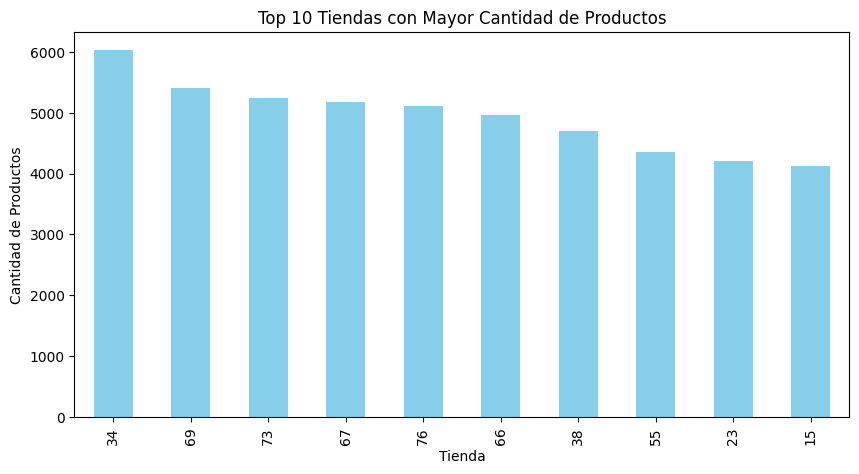

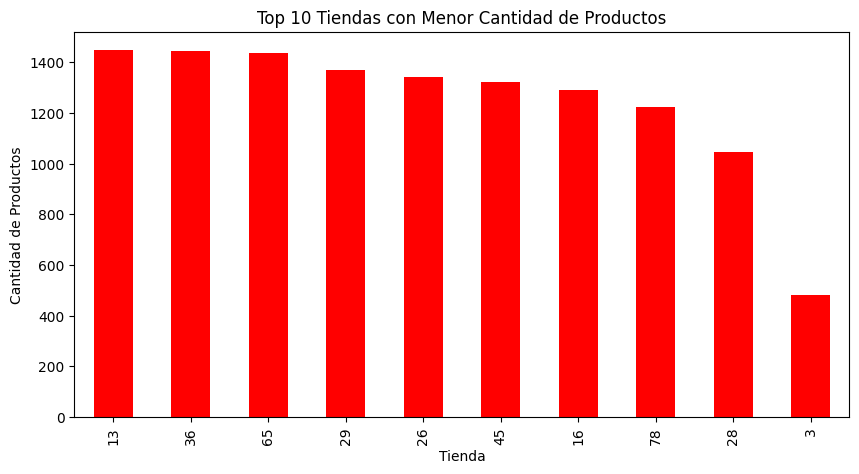

In [14]:
# Top 10 tiendas con mayor cantidad de productos
top_10_mayor = InventarioInicial2016['Store'].value_counts().head(10)

# Top 10 tiendas con menor cantidad de productos
top_10_menor = InventarioInicial2016['Store'].value_counts().tail(10)

# Gráfico para tiendas con mayor cantidad de productos
plt.figure(figsize=(10, 5))
top_10_mayor.plot(kind='bar', color='skyblue')
plt.title('Top 10 Tiendas con Mayor Cantidad de Productos')
plt.xlabel('Tienda')
plt.ylabel('Cantidad de Productos')
plt.show()

# Gráfico para tiendas con menor cantidad de productos
plt.figure(figsize=(10, 5))
top_10_menor.plot(kind='bar', color='red')
plt.title('Top 10 Tiendas con Menor Cantidad de Productos')
plt.xlabel('Tienda')
plt.ylabel('Cantidad de Productos')
plt.show()


Tiendas con Mayor Inventario: Podrías identificar las tiendas con la mayor cantidad de productos, lo cual puede indicar una mayor demanda, una ubicación más estratégica, o políticas de inventario más agresivas.

Tiendas con Menor Inventario: Las tiendas con menos inventario podrían estar enfrentando problemas de suministro, menor demanda, o una estrategia de inventario ajustado. Esto puede ser una señal de que es necesario revisar la distribución de productos o ajustar el stock en estas ubicaciones.

#### Distribución de Precios por Marca (Brand)

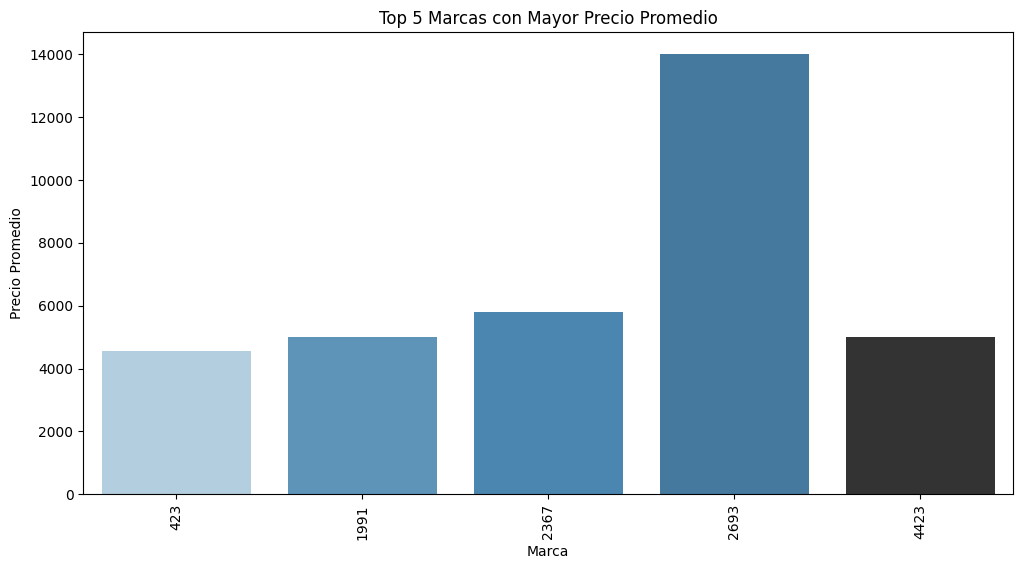

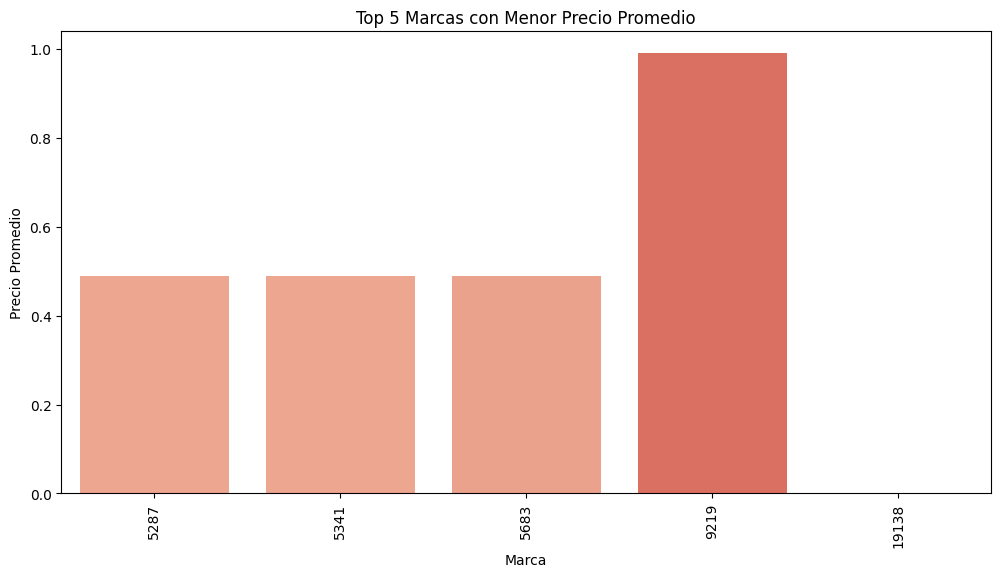

In [15]:
# Calcular precio promedio por marca
precios_por_marca1 = InventarioInicial2016.groupby('Brand')['Price'].mean()

# Top 5 marcas con mayor precio promedio
top_5_mayor_precio = precios_por_marca1.sort_values(ascending=False).head(5)

# Top 5 marcas con menor precio promedio
top_5_menor_precio = precios_por_marca1.sort_values(ascending=True).head(5)

# Gráfico para marcas con mayor precio promedio
plt.figure(figsize=(12, 6))
sns.barplot(x=top_5_mayor_precio.index, y=top_5_mayor_precio.values, hue=top_5_mayor_precio.index, dodge=False, palette='Blues_d')
plt.title('Top 5 Marcas con Mayor Precio Promedio')
plt.xlabel('Marca')
plt.ylabel('Precio Promedio')
plt.xticks(rotation=90)
plt.legend([], [], frameon=False)  # Remueve la leyenda innecesaria
plt.show()

# Gráfico para marcas con menor precio promedio
plt.figure(figsize=(12, 6))
sns.barplot(x=top_5_menor_precio.index, y=top_5_menor_precio.values, hue=top_5_menor_precio.index, dodge=False, palette='Reds_d')
plt.title('Top 5 Marcas con Menor Precio Promedio')
plt.xlabel('Marca')
plt.ylabel('Precio Promedio')
plt.xticks(rotation=90)
plt.legend([], [], frameon=False)  # Remueve la leyenda innecesaria
plt.show()


#### Cantidad de Productos en Stock (onHand) por Ciudad (City)

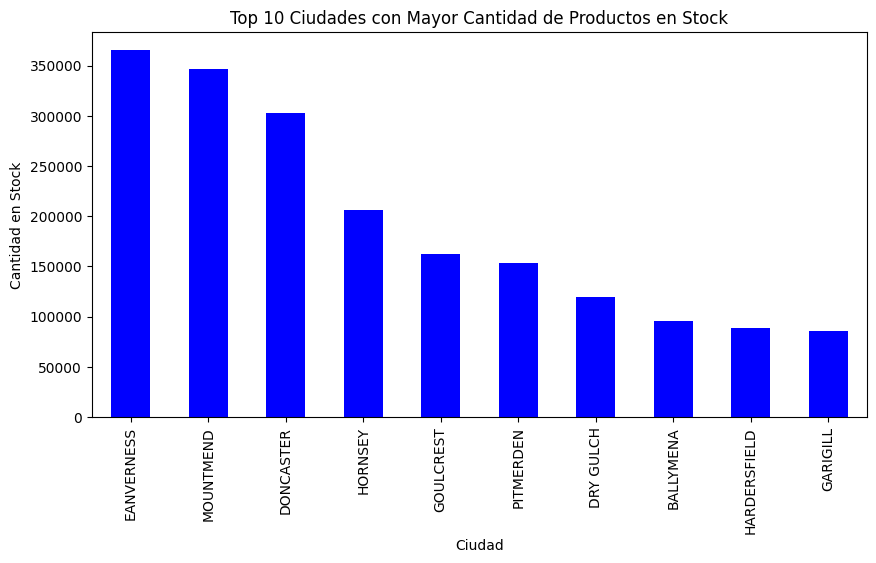

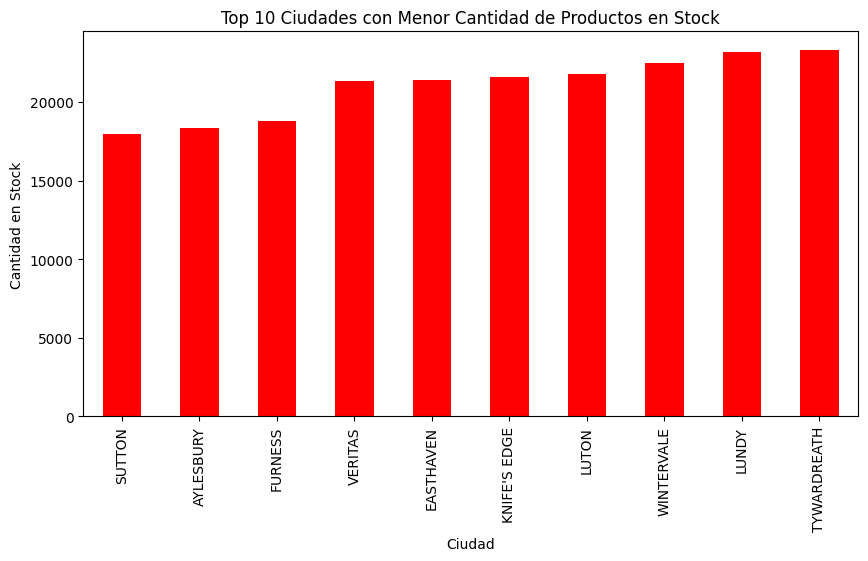

In [16]:
# Sumar productos en stock por ciudad
productos_por_ciudad = InventarioInicial2016.groupby('City')['onHand'].sum()

# Top 10 ciudades con mayor cantidad de productos en stock
top_10_ciudades_mayor = productos_por_ciudad.sort_values(ascending=False).head(10)

# Top 10 ciudades con menor cantidad de productos en stock
top_10_ciudades_menor = productos_por_ciudad.sort_values(ascending=True).head(10)

# Gráfico para ciudades con mayor cantidad de productos en stock
plt.figure(figsize=(10, 5))
top_10_ciudades_mayor.plot(kind='bar', color='blue')
plt.title('Top 10 Ciudades con Mayor Cantidad de Productos en Stock')
plt.xlabel('Ciudad')
plt.ylabel('Cantidad en Stock')
plt.show()

# Gráfico para ciudades con menor cantidad de productos en stock
plt.figure(figsize=(10, 5))
top_10_ciudades_menor.plot(kind='bar', color='red')
plt.title('Top 10 Ciudades con Menor Cantidad de Productos en Stock')
plt.xlabel('Ciudad')
plt.ylabel('Cantidad en Stock')
plt.show()


Ciudades con Mayor Cantidad de Productos: Puedes identificar las ciudades con una gran acumulación de inventario, lo cual puede indicar un mayor potencial de venta, mayores puntos de venta o mejor logística de distribución.

Ciudades con Menor Cantidad de Productos: Las ciudades con menos inventario pueden ser áreas con menor demanda, limitaciones de almacenamiento o problemas logísticos. Podría ser necesario ajustar la estrategia de inventario o distribución en estas áreas.